In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error


In [22]:
df = pd.read_csv("movies_metadata.csv")
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [24]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,999.000000,999.000000,604.000000,999.000000
mean,67.398398,2010.329329,84.100993,80.783784
std,30.783969,8.880562,12.353476,0.973238
min,10.000000,1940.000000,55.000000,80.000000
25%,35.000000,2007.000000,74.750000,80.000000
50%,60.000000,2015.000000,88.000000,80.000000
75%,90.000000,2016.000000,95.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


In [26]:
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  2


In [28]:
dup_bool = df.duplicated(['title','release year','ratingLevel'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 499 duplicate rating entries in the data..


In [32]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.rating)))
print("Total No of movies  :", len(np.unique(df.ratingDescription)))

Total data 
--------------------------------------------------

Total no of ratings : 999
Total No of Users   : 13
Total No of movies  : 11


In [35]:
df.iloc[:int(df.shape[0]*0.80)].to_csv("train.csv", index=False)
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


In [37]:
df.iloc[int(df.shape[0]*0.80):].to_csv("test.csv", index=False)
df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
994,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


In [41]:
train_df = pd.read_csv("train.csv", parse_dates=['title'])
test_df = pd.read_csv("test.csv")
train_df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
...,...,...,...,...,...,...,...
794,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,35,2016,NaN,82
795,Alice Through the Looking Glass,PG,fantasy action/peril and some language,60,2016,96.0,80
796,Quackerz,PG,"rude and suggestive humor, and some action",60,2016,NaN,82
797,Hatched,TV-Y7,Suitable for children ages 7 and older,41,2013,NaN,82


In [42]:
test_df

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,The Real Ghostbusters,TV-Y7,Suitable for children ages 7 and older,41,1990,65.0,80
1,Flubber,PG,slapstick action and mild language,60,1997,83.0,80
2,Anastasia,G,General Audiences. Suitable for all ages.,35,1997,93.0,80
3,An Extremely Goofy Movie,G,General Audiences. Suitable for all ages.,35,1999,67.0,80
4,An American Tail,G,General Audiences. Suitable for all ages.,35,1986,67.0,80
...,...,...,...,...,...,...,...
195,Pup Star,G,General Audiences. Suitable for all ages.,35,2016,NaN,82
196,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.0,80
197,The Secret Life of Pets,PG,for action and some rude humor,60,2016,NaN,81
198,Precious Puppies,TV-G,Suitable for all ages.,35,2003,NaN,82


In [47]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user rating score)))
print("Total No of movies  :", len(np.unique(train_df.rating)))

SyntaxError: invalid syntax (<ipython-input-47-a8f367734b53>, line 4)

In [50]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.title)))
print("Total No of movies  :", len(np.unique(train_df.rating)))


Training data 
--------------------------------------------------

Total no of ratings : 799
Total No of Users   : 440
Total No of movies  : 13


In [51]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.title)))
print("Total No of movies  :", len(np.unique(test_df.rating)))

Test data 
--------------------------------------------------

Total no of ratings : 200
Total No of Users   : 132
Total No of movies  : 7


In [52]:
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

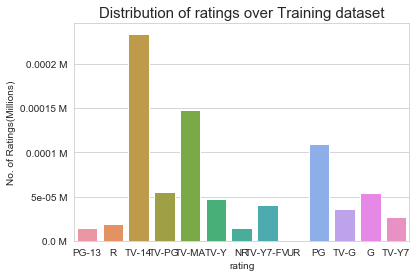

In [53]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

In [62]:
no_of_rated_movies_per_user = train_df.groupby(by='rating')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()


rating
TV-14    234
TV-MA    148
PG       109
TV-PG     55
G         54
Name: rating, dtype: int64

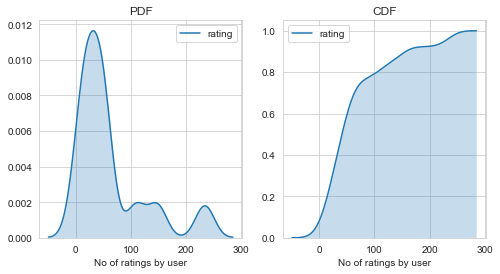

In [63]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [64]:
no_of_rated_movies_per_user.describe()

count     13.000000
mean      61.461538
std       65.822508
min        1.000000
25%       19.000000
50%       40.000000
75%       55.000000
max      234.000000
Name: rating, dtype: float64

In [65]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

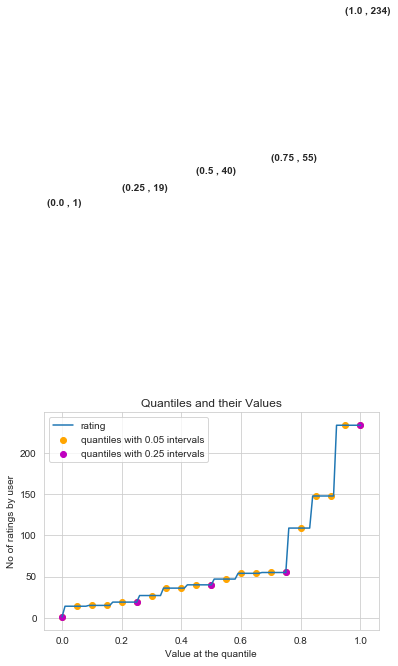

In [67]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

In [68]:
quantiles[::5]

0.00      1
0.05     14
0.10     15
0.15     15
0.20     19
0.25     19
0.30     27
0.35     36
0.40     36
0.45     40
0.50     40
0.55     47
0.60     54
0.65     54
0.70     55
0.75     55
0.80    109
0.85    148
0.90    148
0.95    234
1.00    234
Name: rating, dtype: int64

In [69]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user>= 749)) )


 No of ratings at last 5 percentile : 0



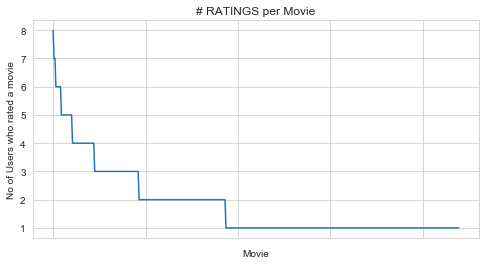

In [71]:
no_of_ratings_per_movie = train_df.groupby(by='title')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

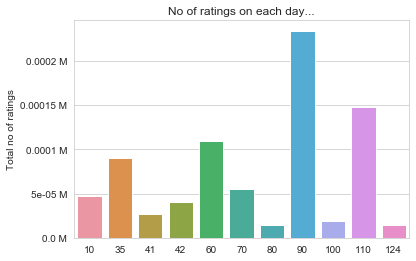

In [75]:
fig, ax = plt.subplots()
sns.countplot(x='ratingDescription', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

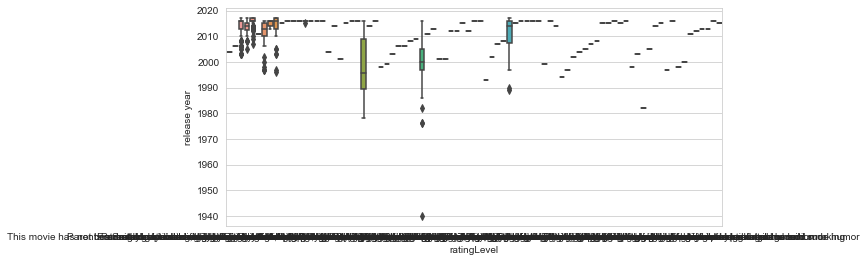

0:00:15.150877


In [80]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='release year', x='ratingLevel', data=train_df)
plt.show()
print(datetime.now() - start)

In [86]:
def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

In [87]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

NameError: name 'train_sparse_matrix' is not defined

In [100]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    

In [112]:
movie_titles = pd.read_csv("movies_metadata.csv", sep=',', header = None,
                           names=['rating', 'year_of_release', 'title'], verbose=True,)

movie_titles.head()

Tokenization took: 0.00 ms
Type conversion took: 1.00 ms
Parser memory cleanup took: 0.00 ms


,,,,rating,year_of_release,title
title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
White Chicks,PG-13,"crude and sexual humor, language and some drug content",80,2004,82,80
Lucky Number Slevin,R,"strong violence, sexual content and adult language",100,2006,NaN,82
Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90,2016,98,80
Prison Break,TV-14,Parents strongly cautioned. May be unsuitable for children ages 14 and under.,90,2008,98,80


In [116]:
import xgboost as xgb

In [129]:
from sklearn.model_selection import train_test_split
start = datetime.now()

if not os.path.isfile('train.csv'or'test.csv'):
    train, test = train_test_split(df, test_size=0.2,shuffle=False)
    train.to_csv('train.csv',index=False)
    test.to_csv('test.csv',index=False)

train_df = pd.read_csv("train.csv", parse_dates=['title'])
test_df = pd.read_csv("test.csv")
print('Time taken :', datetime.now() - start)

Time taken : 0:00:00.184559


In [130]:
def y_labels(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

ModuleNotFoundError: No module named '_plotly_utils'